## Edytor kodu

Polecamy używanie edytora [**Visual Studio Code**](https://code.visualstudio.com/). To jest wszechstronny edytor edytor, 
który posiada ogromną liczbę dodatków "wtyczek" ułatwiających pracę z dowolnego rodzaju kodem. Dodatkową zaletą jest dobra integracja z narzędziami AI.
Wszystkie ustawienia VSCode można zapisać w chmurze, co pozwala na szybką synchronizację środowiska na dowolnej maszynie.

**Proszę:**

* utworzyć, jeśli ktoś nie ma, konto na serwisie [github](https://github.com/)
* zalogować się do github z poziomu VSCode
* włączyć synchronizację

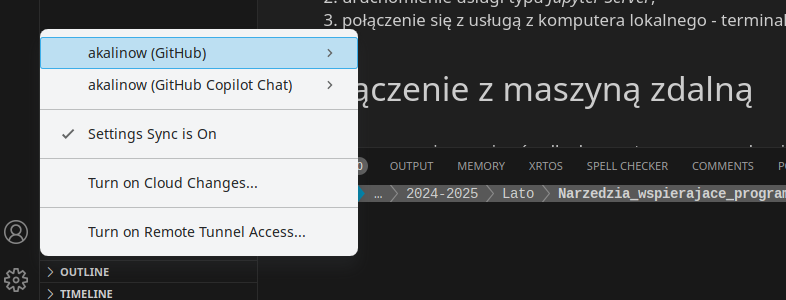




## Połączenie z maszyną zdalną

W każdym szanującym się ośrodku komputerowym urządzenia w wewnętrznej sieci komputerowej (Local Area Netowrk, LAN) są odizolowane od sieci rozległej (Wide Area Network, WAN), czyli całego internetu.

Dostęp do sieci LAN uzyskuje się przez komputer dostępowy - `gateway`. W przypadku studentów Wydziału Fizyki jest to komputer
```Bash
tempac.okwf.fuw.edu.pl
```

Po zalogowaniu się na komputer dostępowy można zalogować się dalej na komputer który dostarcza mocy obliczeniowej, np.
komputery z pracowni:
```Bash
pracownia.okwf.fuw.edu.pl
```


**Proszę:**

* zalogować się na komputer `pracownia` bezpośrednio z laptopa (kto ma)- nie powinno się udać z sieci `FUW.open`
* zalogować się na komputer `tempac`, a potem na komputer `pracownia` 

Instrukcje:

* Linux - należy otworzyć okno terminala
* Windows - aplikacje -> szukaj -> cmd

W oknie terminala należy użyć komendy `ssh`:  
  ```Bash
  ssh login@tempac.okwf.fuw.edu.pl
  ```

i po zalogowaniu na `tempac` jeszcze raz:

  ```Bash
  ssh login@pracownia.okwf.fuw.edu.pl
  ```

Po zalogowaniu się można pracować na zdalnej maszynie. Oczywiście takie logowanie w dwu krokach jest bardzo niewygodne.
Można je ułatwić używając tunelowania sieciowego. W tym celu trzeba dodać odpowiedni wpis do konfiguracji programu `ssh`
(ta sama lokalizacja na Linux i Windows):
```Bash
.ssh/config
```

Jeśli nie ma takiego pliku w katalogu użytkownika, to należy go stworzyć. W pliku `config` umieszczamy bloki konfigurujące dostęp do zdalnych maszyn. W przypadku pracowni taki blok powinien wyglądać następująco:
```Bash
Host pracownia
     ForwardX11 yes
     ForwardAgent yes
     UserKnownHostsFile ~/.ssh/known_hosts
     Hostname pracownia.okwf.fuw.edu.pl
     RequestTTY yes
     ProxyJump YOUR_LOGIN_ON_TEMPAC@tempac.okwf.fuw.edu.pl:22
     User YOUR_LOGIN_ON_TEMPAC
```

**Proszę:**

* zmodyfikować swój plik `.ssh/config` i dodać wpis dla komputera `pracownia`
* zalogować się na komputer `pracownia`:
  ```Bash
  
  ssh pracownia
  ```

Te same operacje można łatwo skonfigurować w VSCode:

1) instalujemy wtyczkę "Remote Explorer":

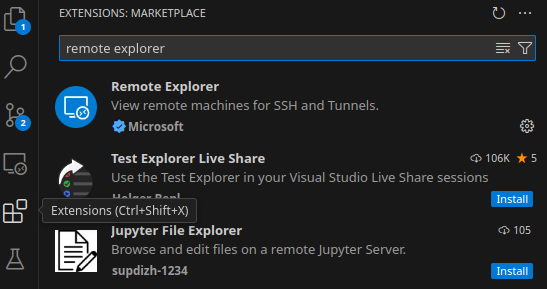

2) konfigurujemy zdalne połączenie używając wtyczki:

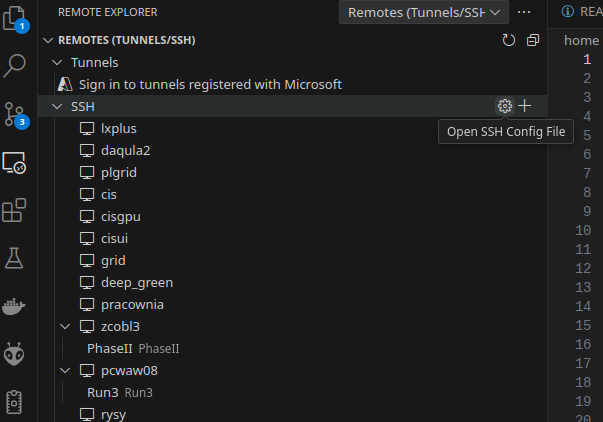


3) łączymy się ze zdalną maszyną z poziomu VSCode:

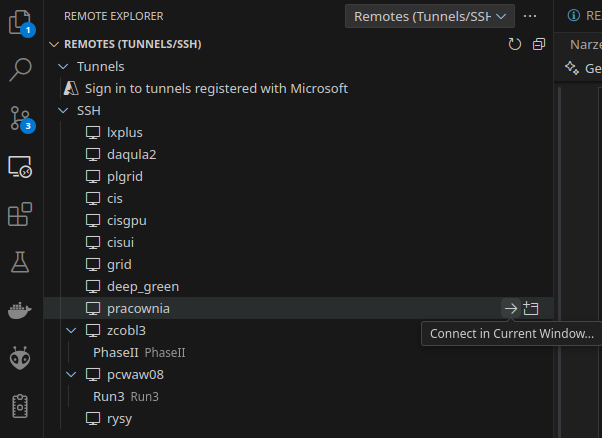




## Terminal

Praca z komputerem w środowisku Linux wymaga dostępu do terminala. W VSCode możemy otworzyć wiele terminali w głównym oknie.

**Proszę:**

* otworzyć okno terminala w VSCode
* podzielić je na dwa okna

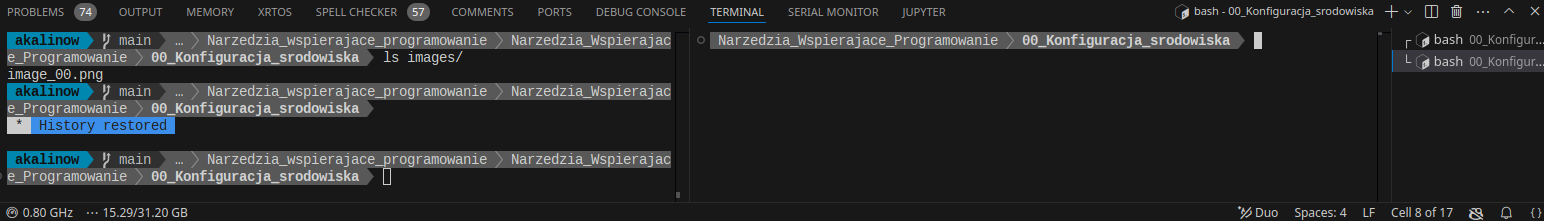


## Jupyter

Alternatywną metodą dostępu do zdalnego komputera jest uruchomienie serwera Jupyter na zdalnej maszynie i dostęp do niego z poziomu przeglądarki
na maszynie lokalnej. Dostęp do usługi WWW, czyli serwera Jupyter, z komputera zdalnego wymaga konfiguracji dostępu do zasobów w sieci wewnętrznej.
Można to uzyskać na dwa sposoby:

* uruchomienie aplikacji **Virtual Private Network (VPN)** która powoduje że nasz lokalny komputer, niezależnie od miejsca w którym się znajduje, jest rozpoznawany w Internecie jakby był podłączony do sieci lokalnej. VPN wymaga konfiguracji po stronie serwera i klienta. W szczególności posiadania konta w usłudze VPN w sieci lokalnej

* przekazanie portów (ang. port forwarding) - komunikacja przez WWW z naszym lokalnym komputerem jest przekazywana do komputera zdalnego za pośrednictwem połączenia ssh.
  Do uruchomienia tej usługi wystarczy możliwość wykonania połączenia `ssh`.

  **Proszę:**

  * dodać do konfiguracji połączenia ssh z komputerem `pracownia` linię która przekaże dane skierowane na lokalny port `8888` na port `8888` komputera pracownia:

```Bash
Host pracownia
     ForwardX11 yes
     ForwardAgent yes
     UserKnownHostsFile ~/.ssh/known_hosts
     Hostname pracownia.okwf.fuw.edu.pl
     LocalForward 8888 localhost:8888                         <--------------
     RequestTTY yes
     ProxyJump YOUR_LOGIN_ON_TEMPAC@tempac.okwf.fuw.edu.pl:22
     User YOUR_LOGIN_ON_TEMPAC
```

Komputer pracownia jest tylko jeden i nie możemy wszyscy na nim zacząć uruchamiać rzeczy.
**Proszę:**

* sprawdzić jak się nazywa komputer osoby po lewej stronie (założyć cykliczność miejsc w sali) i napisać blok w pliku `.ssh/config` analogiczny jak dla pracownia:

```Bash
Host pdXXX
...
...
```

* zalogować się na komputer po lewej
* uruchomić na nim serwer jupyter:

```Bash
jupyter lab --ip 0.0.0.0 --no-browser --notebook-dir=$HOME
```
* podłączyć się do serwera ze swojego komputera podając **lokalny** adres URL w przeglądarce:

```Bash
http://127.0.0.1:8888/
```

* w oknie Jupyter otworzyć terminal i sprawdzić na jakim komputerze są wykonywane obliczenia

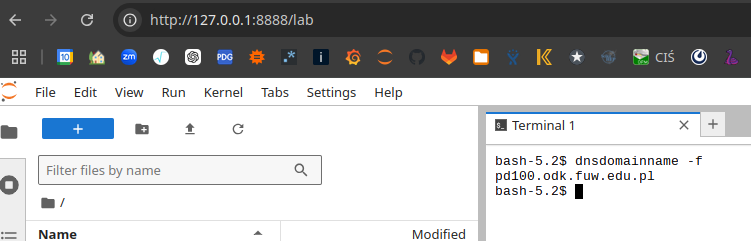


## Kontenery

Dostęp do zasobów obliczeniowych to nie wszystko. Komputer na którym pracujemy musi mieć jeszcze zainstalowane odpowiednie oprogramowanie.
Zwykle nie mamy praw administratora by zainstalować oprogramowanie którego potrzebujemy. Ten problem jest rozwiązany przez utworzenie wydzielonego środowiska w któ©ym każdy użytkownik może zainstalować aplikacje których potrzebuje.

Obecnie najbardziej ogólnym narzędziem dostarczającym takiego wydzielonego środowiska są **kontenery**.

Kontener zachowuje się jak wirtualna maszyna. Konfigurując kontener możemy zainstalować na nim oprogramowanie którego potrzebujemy.
Na maszynie obliczeniowej uruchamiamy kontener i mamy do dyspozycji wszystkie aplikacje które zainstalowaliśmy.

Istnieje kilka aplikacji, które pozwalają na uruchomienie kontenerów. Dwie najbardziej popularne to :

* [Docker](https://www.docker.com/) - dominujący na rynku. Łatwa obsługa z użyciem interfejsu graficznego, dostępny na każdej platformie. 
<span style="color:red">Wymaga uprawnień administratora.</span>

* [apptainer](https://apptainer.org/) - powszechnie używany w ośrodkach obliczeniowych, nie wymaga uprawnień administratora,
<span style="color:blue">może używać plików Docker</span>


**Proszę:**

* uruchomić kontener zawierający środowisko przygotowane dla naszych zajęć:
```Shell
~akalinow/Publiczny/UczenieMaszynoweII/ml_lecture
```
* w kontenerze uruchomić serwer jupyter:
```Shell
jupyter lab --no-browser --ip=0.0.0.0 --notebook-dir=$HOME
```
* otworzyć okno Jupyter na lokalnym komputerze używając URL wypisanego w oknie gdzie uruchomiono serwer, np.:
```Shell
http://127.0.0.1:8888/lab?token=e7862a89b9fe602cb31391359f8516376
```

**Uwaga 1:** proszę zwrócić uwagą na adres - trzeba użyć adresu IP lokalnego komputera: `127.0.0.1`.
dostęp przez adres IP lub DNS komputera zdalnego,  ```pd100.odk.fuw.edu.pl``` zadziała jedynie jeśli łączymy się z komputera
w tej samej sieci LAN co komputer ```pd100```, czyli np. sieci wewnętrznej FUW.

**Uwaga 2:** komputery ```pracownia``` nie nadają się do treningu modeli uczenia maszynowego. Kroki powyżej stanowią jedynie trening.

**Uwaga 3:** analogiczny dostęp można uzyskać z wtyczką ```Remote explorer``` do Visual Studio.

Środowisko programistyczne: interpreter Python i potrzebne biblioteki można instalować samodzielne.
Dużo wygodniejszą opcją są kontenery - zestawy oprogramowania, włącznie z systemem operacyjnym, które można uruchomić na dowolnej maszynie
i uzyskać ściśle określone środowisko pracy. Po wstępnej konfiguracji praca z kontenerami jest bardzo łatwa.

# Zadanie domowe 

**Proszę:**

* osoby z laptopami z Windows: o instalację aplikacji [Docker Desktop](https://docs.docker.com/desktop/install/windows-install/)
* osoby z laptopami z Linuksem: o instalację pakietu [Docker Engine](https://docs.docker.com/engine/install/ubuntu)
* po instalacji proszę uruchomić testowy kontener `hello_world`
  (Windows - proszę otworzyć okno powłoki: `power shell` i pominąć komendę `sudo`):
  ```Shell
  sudo docker run hello-world
  ```

Oczekiwany wynik:

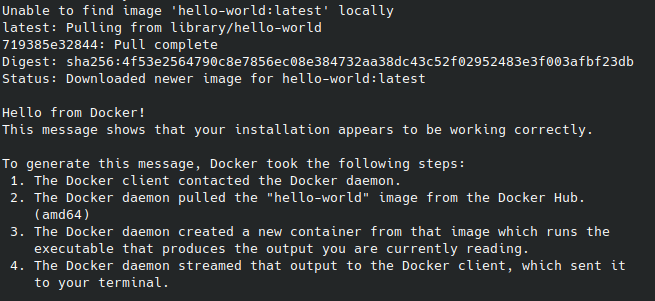

# Kontener przygotowany na zajęcia

Do wykładu został przygotowany kontener zawierający potrzebne pakiety Python oraz server Jupyter. 


**Proszę:**

* pobrać i uruchomić kontener [akalinow/ml_lecture](https://hub.docker.com/repository/docker/akalinow/ml_lecture/general)


Linux:

```
sudo docker run --name ml_lecture --rm -e DISPLAY=$DISPLAY  -v /home/$USER:/scratch -v /tmp/.X11-unix:/tmp/.X11-unix:ro  -w /home/jupyter -p 8888:8888 akalinow/ml_lecture /home/jupyter/start-jupyter.sh
```

Windows:
```
mkdir %USERPROFILE%\Docker
set WORKING_DIR=%USERPROFILE%\Docker
docker pull akalinow/ml_lecture
docker run --name ml_lecture -v %WORKING_DIR%:/scratch -w /home/jupyter -p 8888:8888 akalinow/ml_lecture /home/jupyter/start-jupyter.sh
```

Oczekiwany wynik:

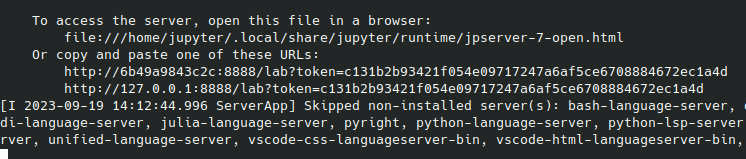

<br></br>

**Uwaga 1:** użycie GPU na lokalnym komputerze wymaga kilku dodatkowych kroków. Zainteresowane osoby proszę o kontakt.

**Uwaga 2:** na maszynach pod Linux polecam użycie [apptainer](https://apptainer.org/get-started) zamiast Dockera. W apptainer można uruchamiać także kontenery zbudowane z Dockerem

**Uwaga 3:** komenda w wersji dla Windows nie ma parametru `--rm` co oznacza że pliki kontenera są zachowane po jego zamknięciu. Komendy `docker run` należy użyć tylko za pierwszym razem. Przy kolejnych sesjach trzeba urucomić kontener wybierając jego nazwę z listy w aplikacji Docker desktop.


**Proszę:**

* otworzyć adres URL serwera Jupyter ze swojej lokalnej maszyny
* pobrać notatnik `01a_Przypomnienie_python.ipynb` na lokalny komputer
* uruchomić wszystkie komórki w notatniku na lokalnym komputerze

Notatniki Jupyter można także uruchamiać w Visual Studio.
Jako jądra wykonawczego można użyć jądra dostarczonego przez kontener:

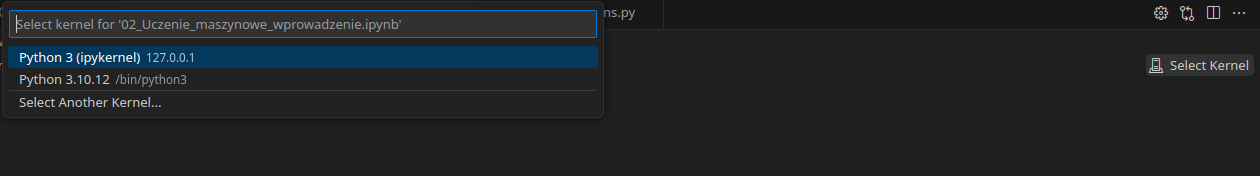

Dzięki temu mamy:

* zalety z używania Visual Studio - duża liczba przydatnych wtyczek, autouzupełniania (`dumb` i `AI`)
* zalety z używania kontenera - uniknięcie ręcznego instalowania wymaganych pakietów

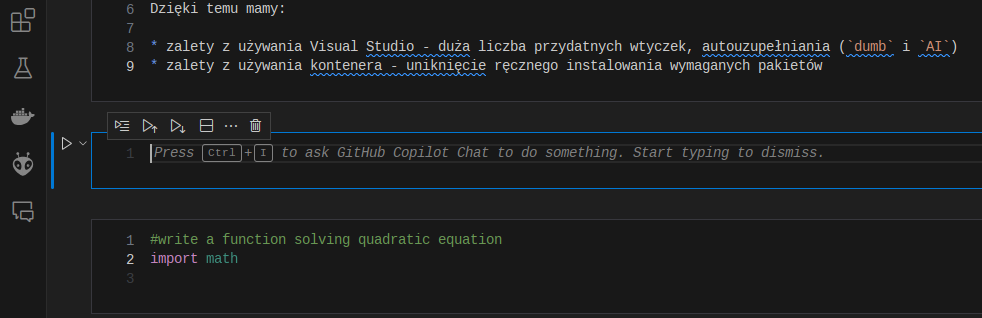